# PP2 - Parte 2

## Notebook do exercício prático 2, Parte 2

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131

## Import das bibliotecas

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Import do arquivo a ser usado

In [2]:
dados_brutos = np.fromfile('./data2.txt')


## Organização dos dados

In [3]:
dados = dados_brutos.reshape((600,3))
dados = dados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


## Inicialização das configurações a serem usadas

In [4]:
# Distribuição uniforme aleatório dos pesos,
# Produto cartesiano a ser feito
pes = np.array([0.4, 0.1, 0.01])
aleatorio = np.array([[-100,100], [-1, 1], [-0.5, 0.5]])

# Vetores vazios que serão adicionados
configuracoes = np.array([]).reshape(0, 2)
vetor_peso = np.empty([9, 3])

for i in range(3):
    for j in range(3):
        config = aleatorio[i] * pes[j] # Produto cartesiano
        # print(config)

        # Adicionar ao vetor de configurações possíveis
        configuracoes = np.vstack((configuracoes, config))

        #Adicionar ao vetor de pesos aleatórios
        # vetor_peso = np.vstack((vetor_peso, np.random.uniform(config[0], config[1], 3)))

print("Configurações: ", configuracoes)
# print("Pesos: ", vetor_peso)

Configurações:  [[-4.e+01  4.e+01]
 [-1.e+01  1.e+01]
 [-1.e+00  1.e+00]
 [-4.e-01  4.e-01]
 [-1.e-01  1.e-01]
 [-1.e-02  1.e-02]
 [-2.e-01  2.e-01]
 [-5.e-02  5.e-02]
 [-5.e-03  5.e-03]]


## Função de ativação

In [5]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
    if saida >= 0:
        return 1
    else:
        return 0
        

## Principal - Aprendizado

In [6]:
res_temp = 0                                          # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(600)                           # Vetor que será comparado com o resultado

n = 0.1                                               # Taxa de aprendizado
mudanca_peso = 0                                      # N de ajustes de peso
mudanca_total = 0                                     # N total de ajustes de peso
epoca = 0                                             # Epocas de ajuste

vetor_epoca = np.zeros([9, 100], dtype=int)           # Vetor das epocas
vetor_mudanca_peso = np.zeros([9, 100], dtype=int)    # Vetor dos ajustes totais

fa = 0              # Funcao de ativacao

# No caso do pp2, vai repetir 9 vezes
for possibilidades in range(len(configuracoes)):

    #Repetir 100 vezes para gerar dados
    for instancia in range(100):

        vetor_peso[possibilidades] = np.random.uniform(configuracoes[possibilidades][0], configuracoes[possibilidades][1], 3) 

        #Ele só para quando o vetor de respostas for igual ao vetor final
        while(True):

            #Repetir pela quantidade de vezes que tiver nos dados
            for i in range(len(dados[0])):

                # Soma dos produtos
                vetor_res_temp = (x0 * vetor_peso[possibilidades][0]) + (vetor1[i] * vetor_peso[possibilidades][1]) + (vetor2[i] * vetor_peso[possibilidades][2])

                # funcao de ativacao
                fa = funcao_ativacao(vetor_res_temp)

                vetor_final[i] = fa

                if (fa != vetor_resposta[i]): #Se estiver errado

                    #Erro é (esperado - funcao ativacao)
                    erro = vetor_resposta[i] - fa

                    valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
                    #Ajuste de peso
                    vetor_peso[possibilidades] = vetor_peso[possibilidades] + (n*erro*valor_anterior)

                    #Adicionar quantidade de mudanças totais
                    vetor_mudanca_peso[possibilidades][instancia] += 1

            #Adicionar quantas epocas houveram
            vetor_epoca[possibilidades][instancia] += 1

            if((vetor_resposta == vetor_final).all()):
                break


print("acabou!")
# Se for true, quer dizer que os dois são iguais, chegou a uma convergência
# print((vetor_resposta == vetor_final).all())


acabou!


## Calculo da Média e Desvio padrão dos ajustes e épocas

In [7]:
#Vetor das 100 mudancas e epocas
print(vetor_mudanca_peso)
print(vetor_epoca)

[[ 788  536  423  926  348  678  462  783  740  351  924 1106  789  576
  1114  531  981  763  363  892 1245 1043  222  211  369  820  482  749
    85  355  930   35   11  518  676   58  831  328  239  388 1020   39
   220 1098 1238  982  384  312  521  668  732  166    2  702  876  674
   659  354  896  291  513  199  701  241  137    0   94   18  100  748
   382  958  777  977  266  566  273  410  496  482   54  356  994 1013
   537  987  672  318  781  449  351 1210  259  385  276  809  243  836
   631  738]
 [ 221  178  220   40   44  138   95   67  238   35   77  185    0  134
   121  171   96  398  126   35  220  189   43  248   77  117  163  214
    74  117   56   40  143   30   14   87  191  244  199   70   29  124
     5  143   71  164  142  100  269  248  225  105  259   97  112  148
    77  112  257  158  127  102  106  198  186  282  155  229  166  233
   132  153  164  238   86   24   30  198  168    8   74   35  203   38
    81  182   41  116  221  277  133   71   82   95

In [8]:
# Media e desvio padrao dos ajustes
ajuste_vetor_medias = np.zeros(9)
ajuste_vetor_desvio_padrao = np.empty(9)

#Media e desvio padrao da epoca
epoca_vetor_medias = np.empty(9)
epoca_vetor_desvio_padrao = np.empty(9)

for i in range(len(vetor_epoca)):
    ajuste_vetor_medias[i] = np.mean(vetor_mudanca_peso[i])
    ajuste_vetor_desvio_padrao[i] = np.std(vetor_mudanca_peso[i])

    epoca_vetor_medias[i] = np.mean(vetor_epoca[i])
    epoca_vetor_desvio_padrao[i] = np.std(vetor_epoca[i])


print(ajuste_vetor_medias)
print(ajuste_vetor_desvio_padrao)

print(epoca_vetor_medias)
print(epoca_vetor_desvio_padrao)

[557.4  139.11  22.06  13.94  10.62   9.12  11.57  11.33   9.1 ]
[327.34901863  80.18814064  11.64115115   6.24150623   4.46716913
   0.47497368   5.70307812   4.79386066   0.43588989]
[25.95 11.5   5.9   6.02  5.98  5.07  6.02  6.33  5.08]
[20.49749985  5.8779248   2.19317122  2.06387984  1.74917123  0.29171904
  2.14932548  2.05939311  0.36551334]


## Plot do gráfico

[ 788  536  423  926  348  678  462  783  740  351  924 1106  789  576
 1114  531  981  763  363  892 1245 1043  222  211  369  820  482  749
   85  355  930   35   11  518  676   58  831  328  239  388 1020   39
  220 1098 1238  982  384  312  521  668  732  166    2  702  876  674
  659  354  896  291  513  199  701  241  137    0   94   18  100  748
  382  958  777  977  266  566  273  410  496  482   54  356  994 1013
  537  987  672  318  781  449  351 1210  259  385  276  809  243  836
  631  738]


(array([11.,  9., 16., 11.,  8., 12., 12., 12.,  6.,  3.]),
 array([   0. ,  124.5,  249. ,  373.5,  498. ,  622.5,  747. ,  871.5,
         996. , 1120.5, 1245. ]),
 <a list of 10 Patch objects>)

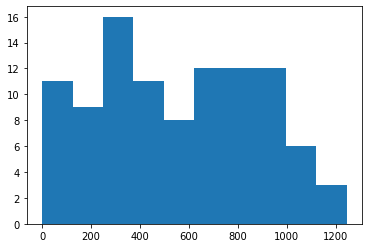

In [9]:
print(vetor_mudanca_peso[0])

plt.hist(vetor_mudanca_peso[0])
